In [1]:
import pygmt
import os
import pandas as pd
import xarray as xr
import numpy as np

dir_1 = "/Users/sanjay/PycharmProjects/GNS/NZ_SHM_2010/Hazard_maps/NZ_SHM_all_TRTs/outputs/VS_560/mcverry_06_MW"
dir_2 = "/Users/sanjay/PycharmProjects/GNS/NZ_SHM_2010/Hazard_maps/NZ_SHM_all_TRTs/outputs/VS_560/Logic_tree_set_2"

In [3]:
file1 = os.path.join("/home/chrisdc/Downloads/hazard_curve-mean-PGA_102.csv")
file2 = os.path.join("/home/chrisdc/Downloads/hazard_curve-mean-PGA_101.csv")

In [4]:
df1 = pd.read_csv(file1, header =1) #MCV
df2 = pd.read_csv(file2, header =1) # Logic Tree

In [5]:
df1.head(5)

,lon,lat,depth,poe-0.0050000,poe-0.0053337,poe-0.0056898,poe-0.0060695,poe-0.0064747,poe-0.0069069,poe-0.0073679,...,poe-1.6771119,poe-1.7890570,poe-1.9084743,poe-2.0358625,poe-2.1717538,poe-2.3167156,poe-2.4713534,poe-2.6363131,poe-2.8122836,poe-3.0000000
0,166.2,-46.0,0.0,0.807566,0.800329,0.792642,0.784482,0.775826,0.766651,0.756937,...,1.526351e-08,2.372084e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,166.2,-45.9,0.0,0.817283,0.810560,0.803397,0.795769,0.787650,0.779012,0.769832,...,1.001993e-06,3.458434e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,166.2,-45.8,0.0,0.825228,0.818900,0.812141,0.804922,0.797216,0.788993,0.780226,...,2.120222e-06,1.098464e-06,4.164489e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,166.2,-45.7,0.0,0.831515,0.825467,0.818993,0.812063,0.804648,0.796716,0.788239,...,1.618683e-05,8.113708e-06,3.095571e-06,5.393638e-07,4.692930e-08,0.0,0.0,0.0,0.0,0.0
4,166.3,-46.1,0.0,0.802353,0.794821,0.786836,0.778377,0.769423,0.759953,0.749950,...,1.552911e-08,2.413360e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [6]:
print(min(df1["lat"]))
print(min(df1["lon"]))
print(max(df1["lat"]))
print(max(df1["lon"]))

region = [
    df1.lon.min() - 1,
    df1.lon.max() + 1,
    df1.lat.min() - 1,
    df1.lat.max() + 1,
]
print(region)

-47.4
166.2
-34.3
178.8
[165.2, 179.8, -48.4, -33.3]


In [14]:
df = df1[["lat", "lon", "poe-0.0170667"]]
print(df)
print(df["poe-0.0170667"].max())
print(df["poe-0.0170667"].min())
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
df_pv.head()
# print(df_pv)
# print(['=']*10)
# grid = xr.DataArray(data=df_pv)
# print(grid)

# fig = pygmt.Figure()
# pygmt.config(FONT_ANNOT_PRIMARY = 14)

# pygmt.makecpt(cmap = "jet", series=[0,1.5,0.1])
# fig.grdimage(grid=grid, projection="M15c", cmap = True, dpi = 100, frame = "a")

# fig.coast(shorelines = True, water="white")
# fig.basemap(frame=["a", "+t2010"])
# fig.colorbar(frame='af+l"PGA (10% PoE in 50)"')
# fig.show()

0.7173042
0.004491397
lon    166.20000  166.30000  166.39999  166.50000  166.60001  166.70000  \
lat                                                                       
-47.4        NaN        NaN        NaN        NaN        NaN        NaN   
-47.3        NaN        NaN        NaN        NaN        NaN        NaN   
-47.2        NaN        NaN        NaN        NaN        NaN        NaN   
-47.1        NaN        NaN        NaN        NaN        NaN        NaN   
-47.0        NaN        NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...        ...   
-34.7        NaN        NaN        NaN        NaN        NaN        NaN   
-34.6        NaN        NaN        NaN        NaN        NaN        NaN   
-34.5        NaN        NaN        NaN        NaN        NaN        NaN   
-34.4        NaN        NaN        NaN        NaN        NaN        NaN   
-34.3        NaN        NaN        NaN        NaN        NaN        NaN   

lo

1.42496
0.08309216


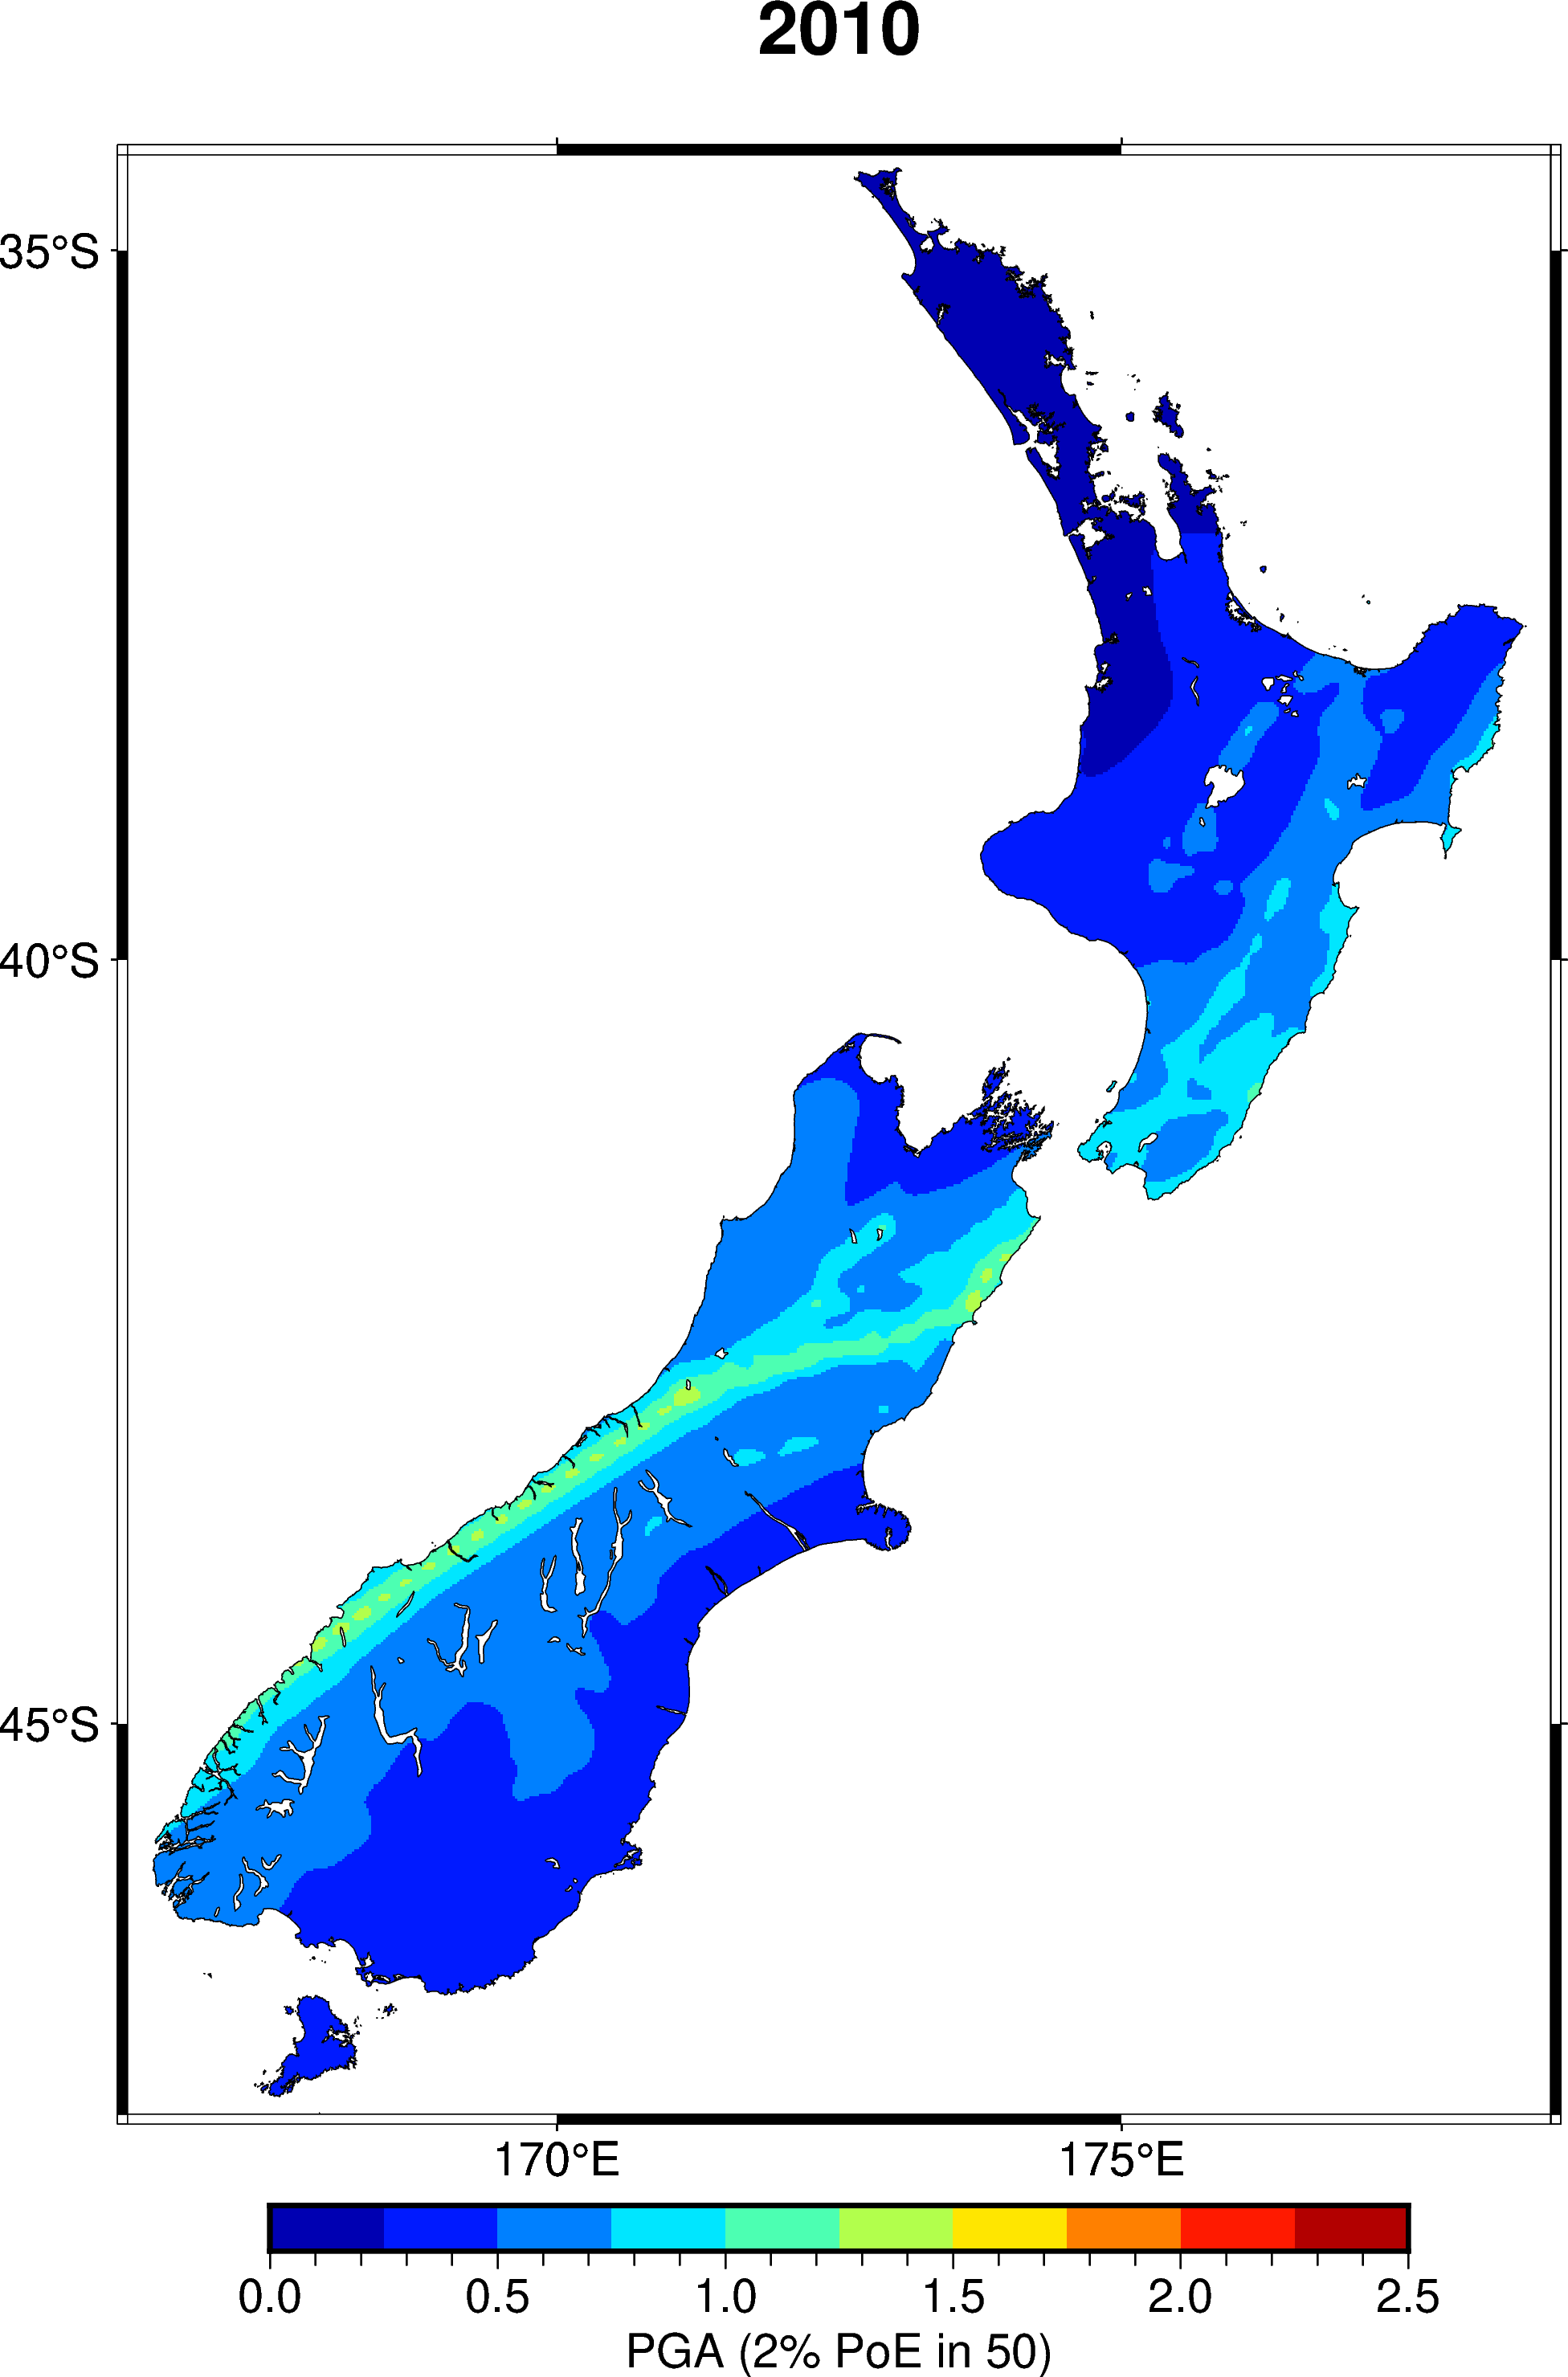

In [7]:
df = df1[["lat", "lon", "PGA-0.000404"]]
print(df["PGA-0.000404"].max())
print(df["PGA-0.000404"].min())
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
df_pv.head()

grid = xr.DataArray(data=df_pv)

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT_PRIMARY = 14)

pygmt.makecpt(cmap = "jet", series=[0,2.6,0.25])
fig.grdimage(grid=grid, projection="M15c", cmap = True, dpi = 100, frame = "a")

fig.coast(shorelines = True, water="white")
fig.basemap(frame=["a", "+t2010"])
fig.colorbar(frame='af+l"PGA (2% PoE in 50)"')
fig.show()

### 2021 Hazard results

1.372683
0.02298177


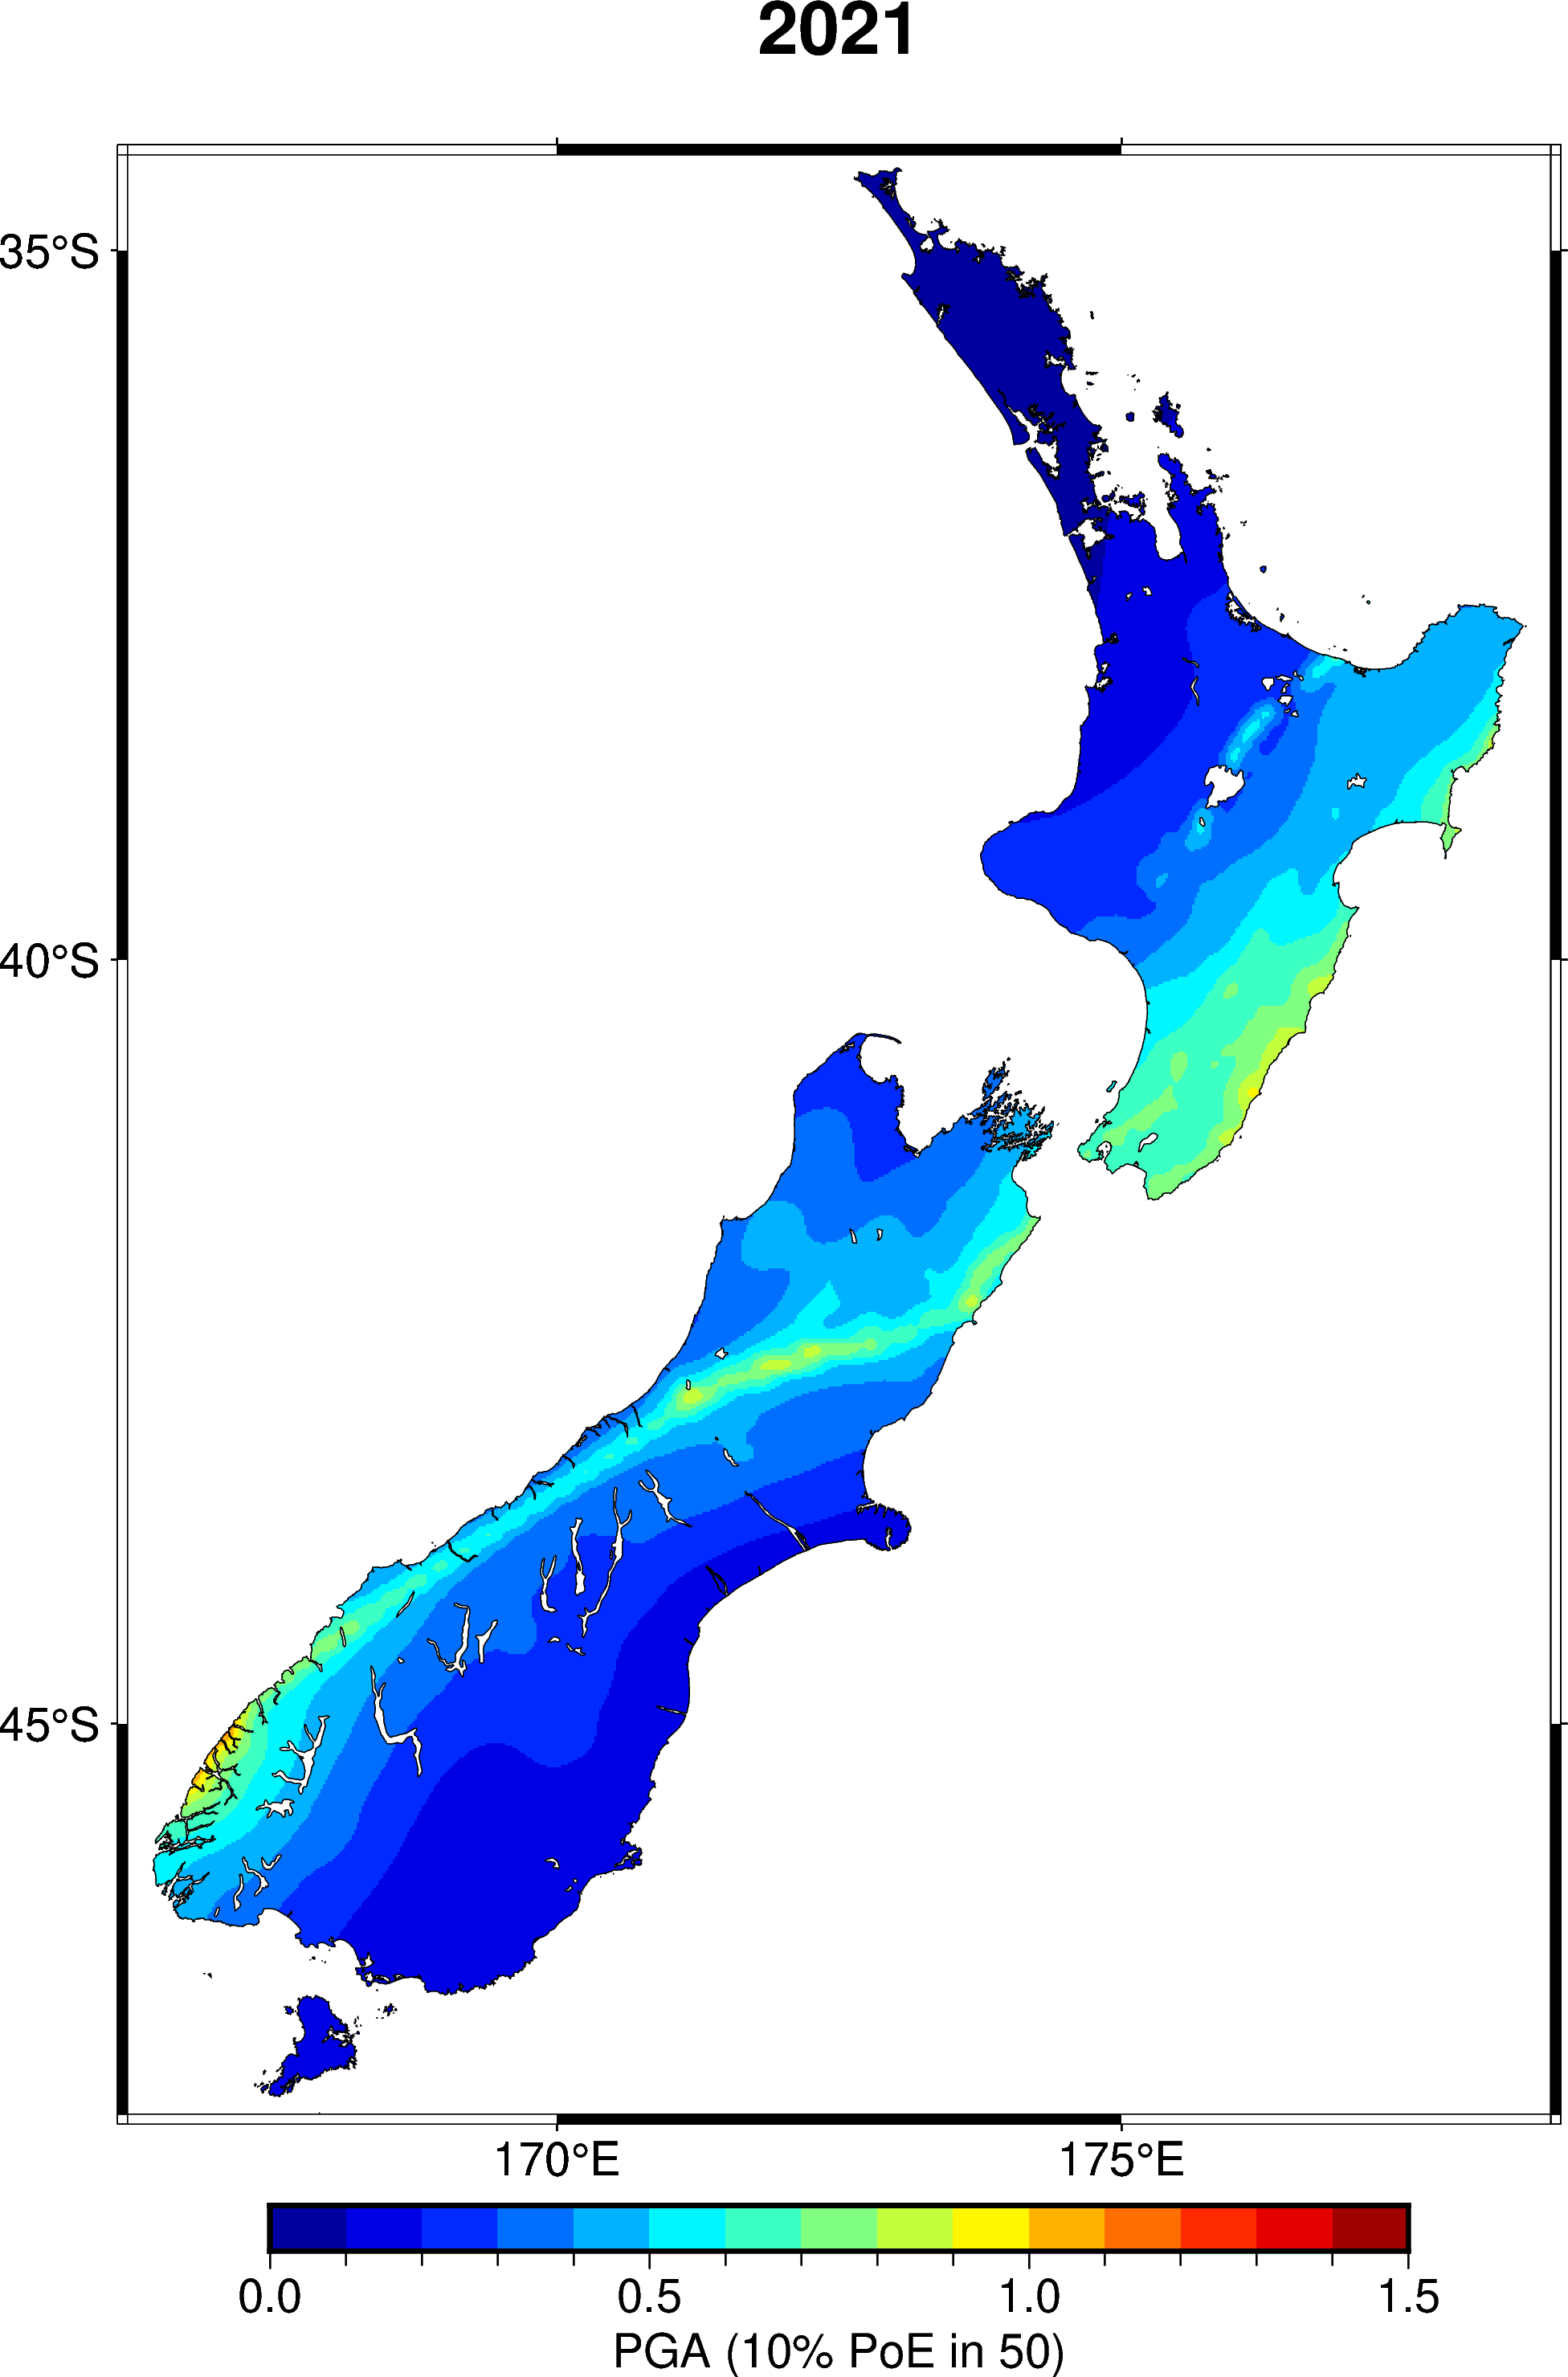

In [8]:
df = df2[["lat", "lon", "PGA-0.002105"]]
print(df["PGA-0.002105"].max())
print(df["PGA-0.002105"].min())
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
df_pv.head()

grid = xr.DataArray(data=df_pv)

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT_PRIMARY = 14)

pygmt.makecpt(cmap = "jet", series=[0,1.5,0.1])
fig.grdimage(grid=grid, projection="M15c", cmap = True, dpi = 100, frame = "a")

fig.coast(shorelines = True, water="white")
fig.basemap(frame=["a", "+t2021"])
fig.colorbar(frame='af+l"PGA (10% PoE in 50)"')
fig.show()

2.538029
0.06917613


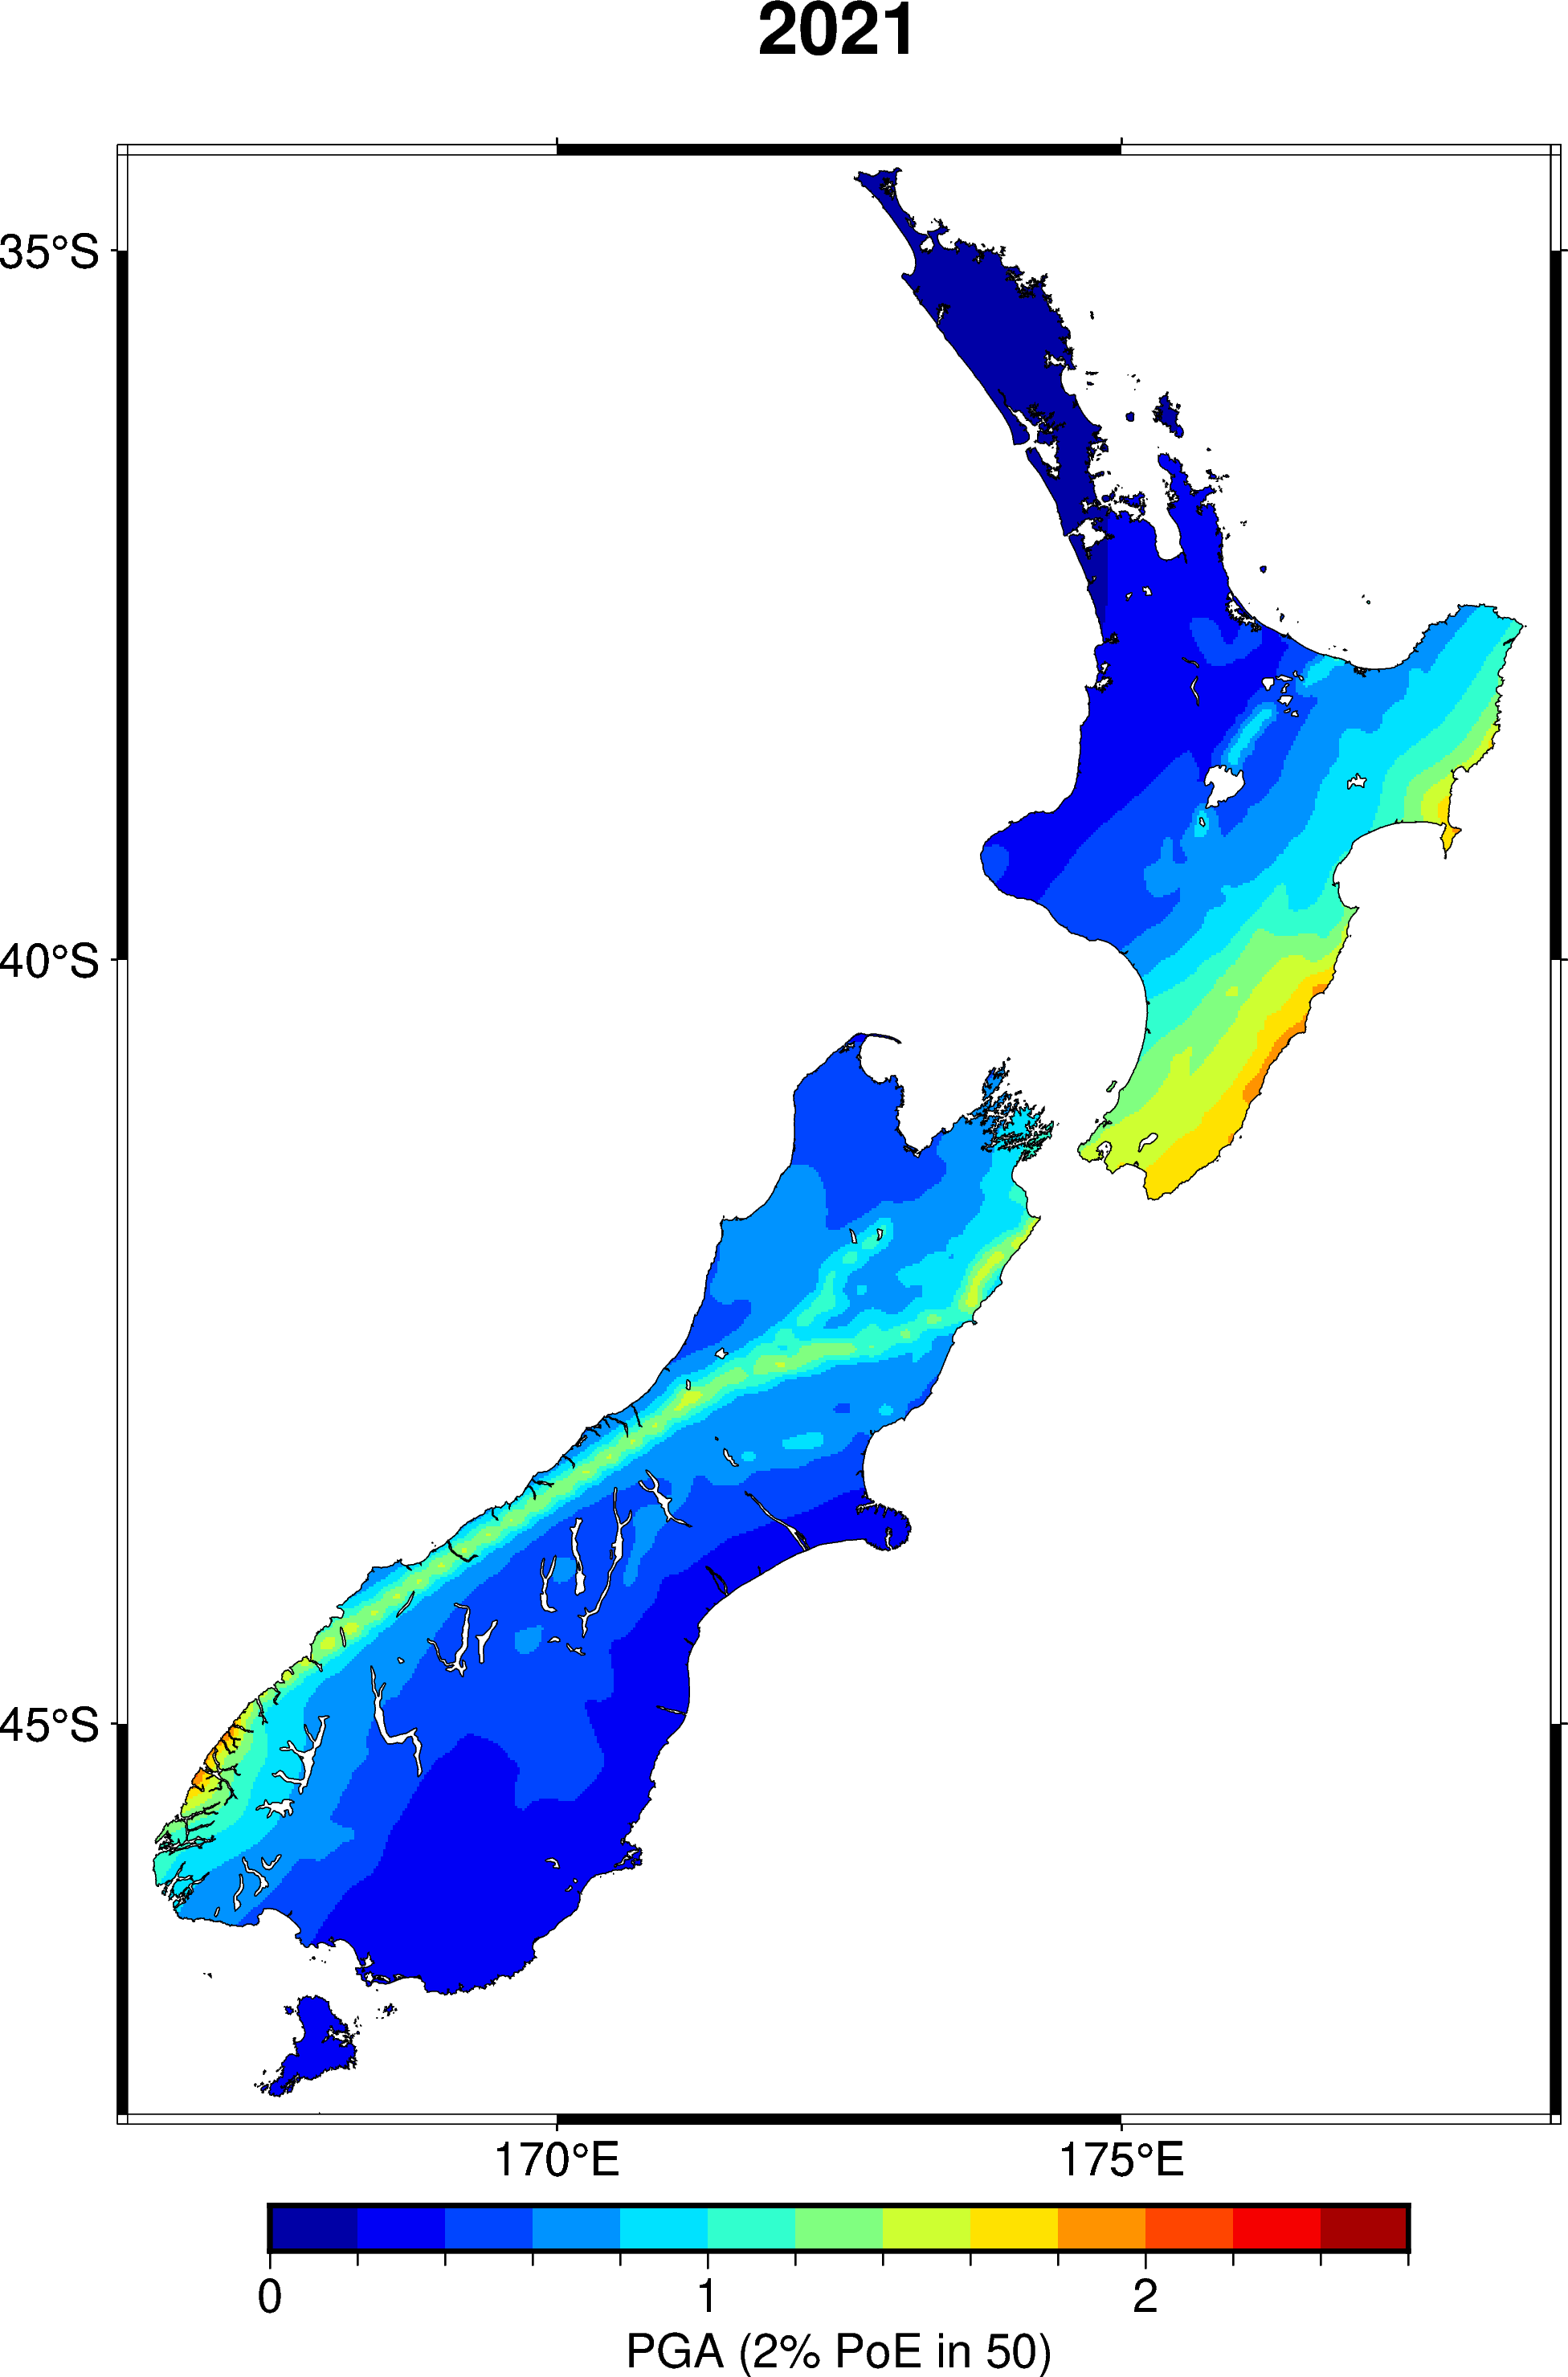

In [9]:
df = df2[["lat", "lon", "PGA-0.000404"]]
print(df["PGA-0.000404"].max())
print(df["PGA-0.000404"].min())
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
df_pv.head()

grid = xr.DataArray(data=df_pv)

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT_PRIMARY = 14)

pygmt.makecpt(cmap = "jet", series=[0,2.6,0.2])
fig.grdimage(grid=grid, projection="M15c", cmap = True, dpi = 100, frame = "a")

fig.coast(shorelines = True, water="white")
fig.basemap(frame=["a", "+t2021"])
fig.colorbar(frame='af+l"PGA (2% PoE in 50)"')
fig.show()

### Plot the difference

In [10]:
df2["PGA_ratio_10"] = df2["PGA-0.002105"]/df1["PGA-0.002105"]
df2["PGA_diff_10"] = df2["PGA-0.002105"]-df1["PGA-0.002105"]
df2["PGA_diff_2"] = df2["PGA-0.000404"]-df1["PGA-0.000404"]
df2.head(5)

,lon,lat,PGA-0.002105,PGA-0.000404,SA(0.2)-0.002105,SA(0.2)-0.000404,SA(0.5)-0.002105,SA(0.5)-0.000404,SA(1.0)-0.002105,SA(1.0)-0.000404,SA(2.0)-0.002105,SA(2.0)-0.000404,SA(3.0)-0.002105,SA(3.0)-0.000404,PGA_ratio_10,PGA_diff_10,PGA_diff_2
0,166.2,-46.0,0.600761,1.247458,1.430744,3.000000,0.901036,2.063308,0.443347,0.983121,0.186230,0.401918,0.106349,0.220540,1.268842,0.127289,0.558145
1,166.2,-45.9,0.684880,1.447951,1.639087,3.000000,1.056757,2.438551,0.520833,1.177441,0.217585,0.475324,0.124010,0.258762,1.348423,0.176968,0.700008
2,166.2,-45.8,0.771921,1.601022,1.858472,3.000000,1.225992,2.715440,0.610354,1.315888,0.256580,0.536757,0.147461,0.298315,1.375064,0.210550,0.766175
3,166.2,-45.7,0.937487,1.866773,2.274138,3.000000,1.528873,3.000000,0.765967,1.588008,0.320329,0.652294,0.183952,0.369721,1.446374,0.289324,0.867473
4,166.3,-46.1,0.535812,1.059171,1.274859,2.571697,0.782615,1.733008,0.384752,0.838668,0.160814,0.342947,0.091104,0.186531,1.198783,0.088849,0.410653


0.6129914999999999
-0.14702900000000002


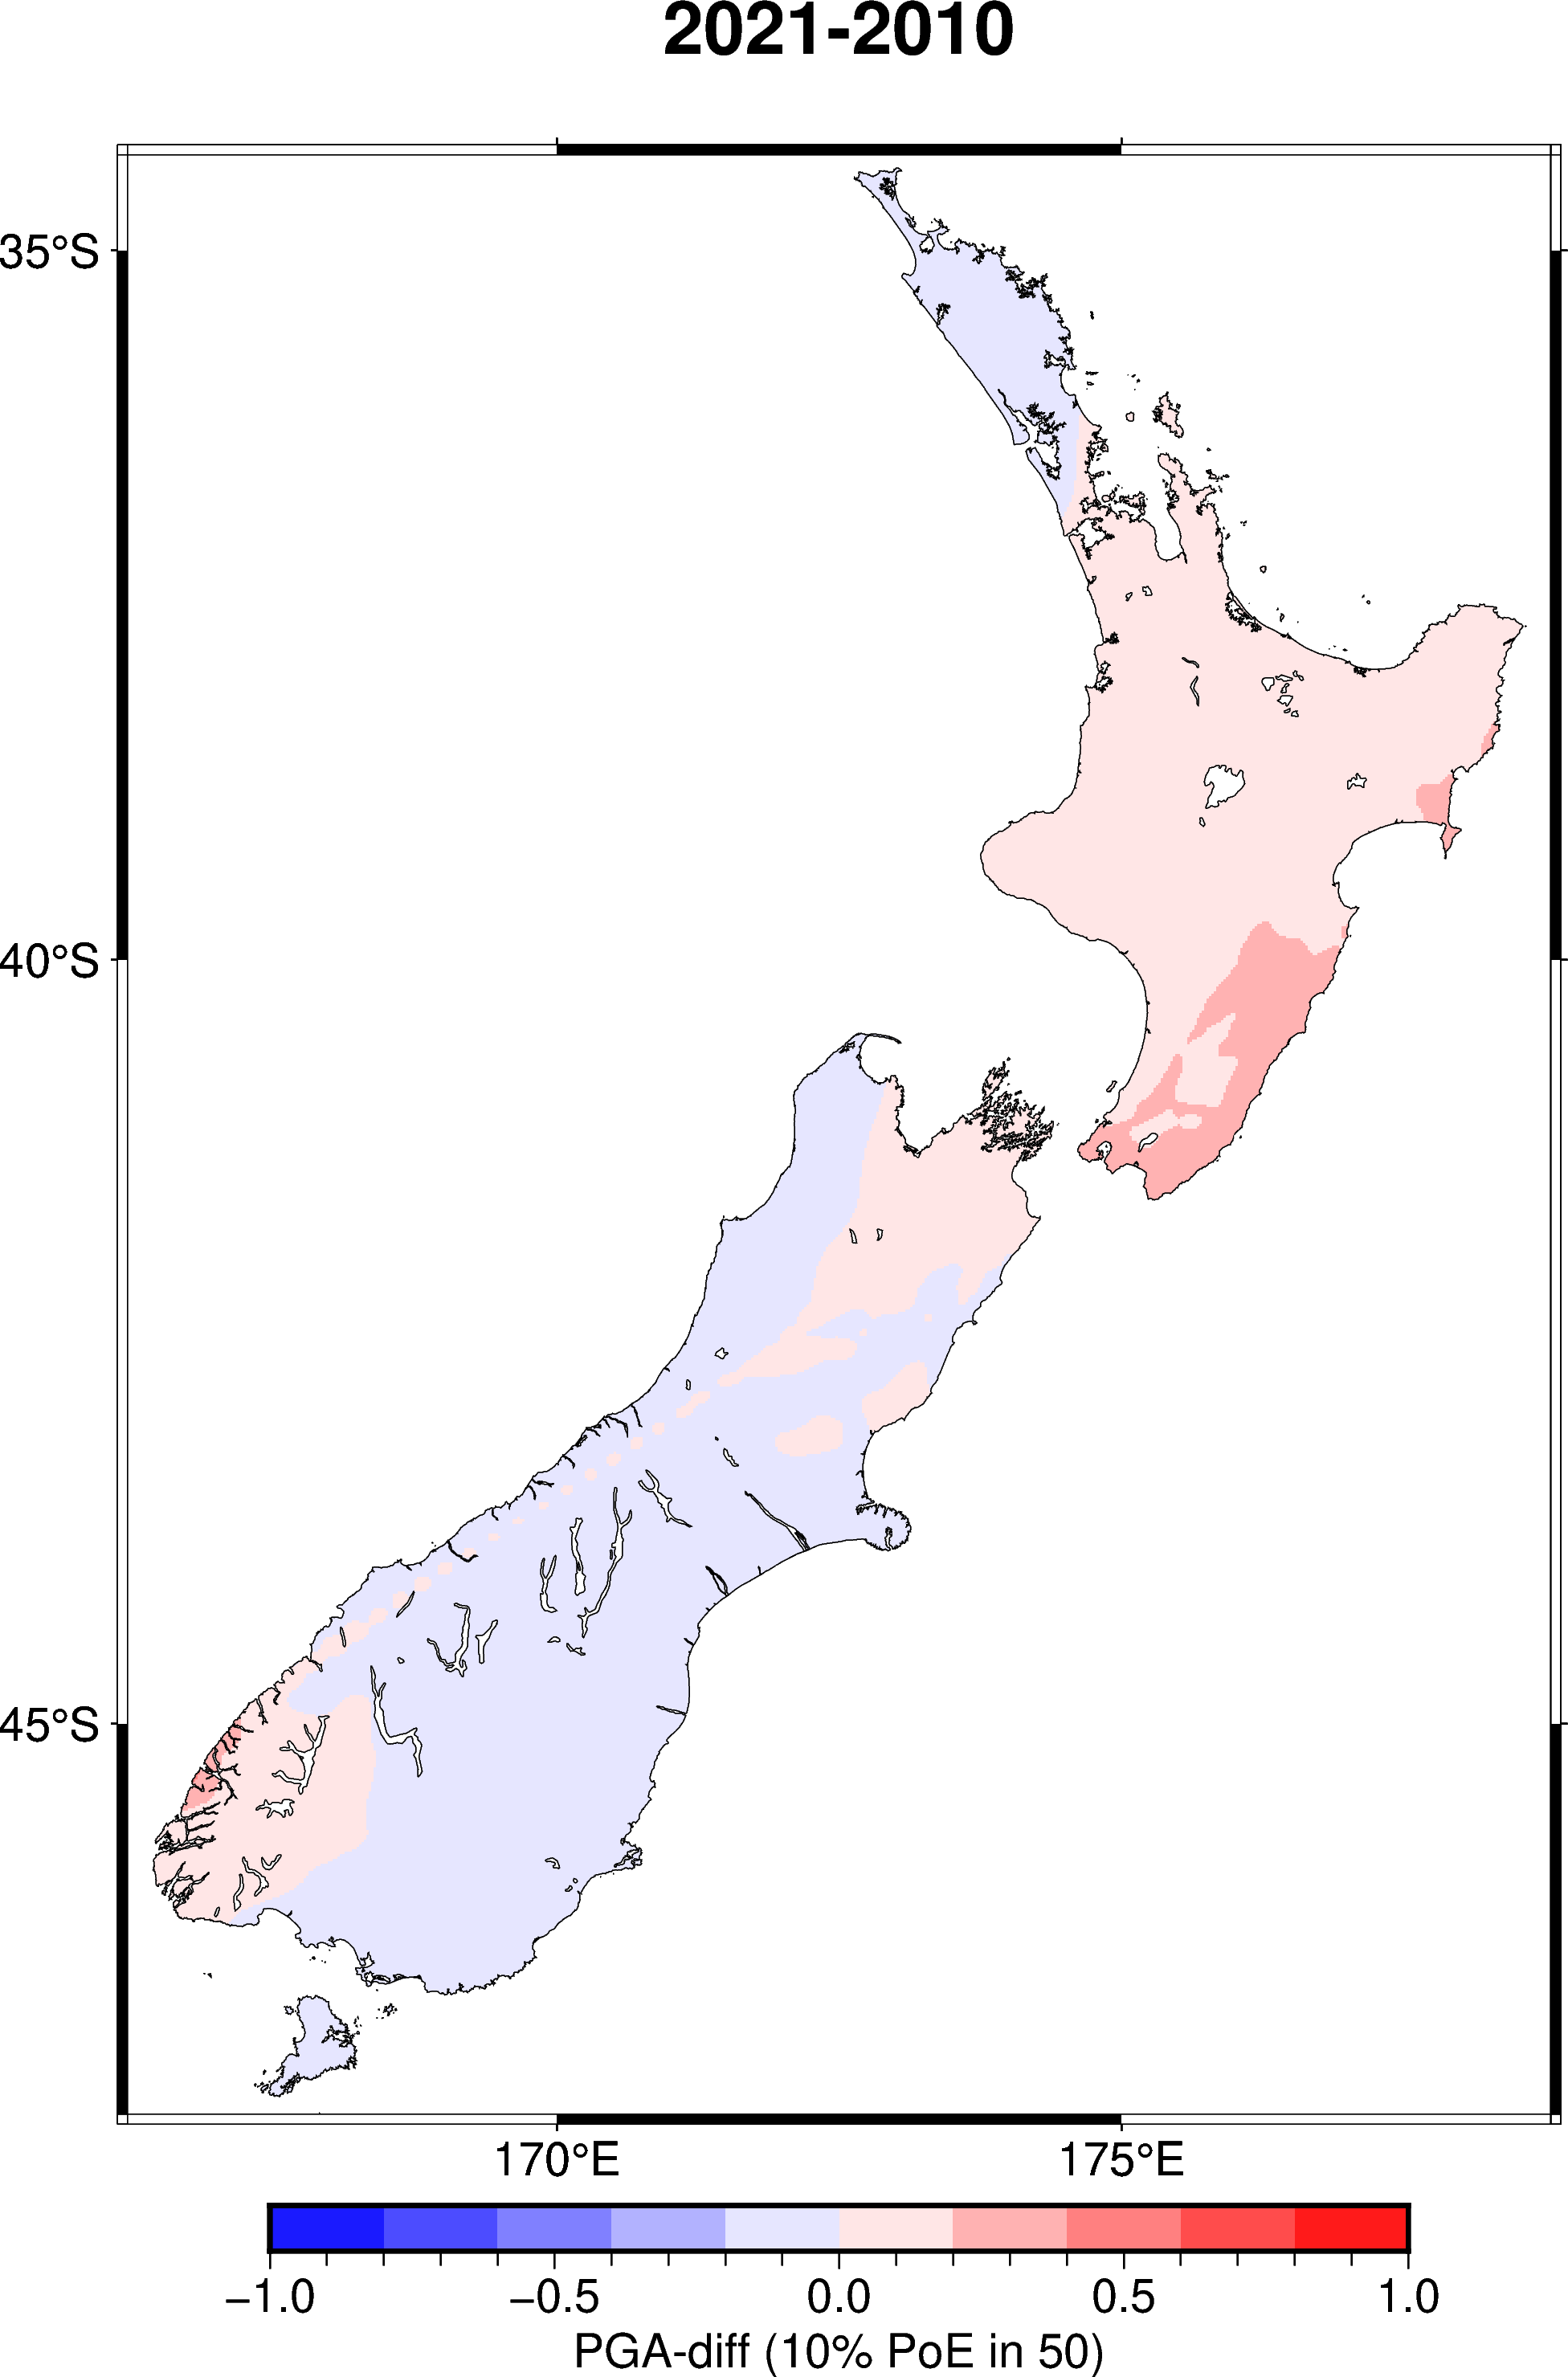

In [11]:
df = df2[["lat", "lon", "PGA_diff_10"]]
print(df["PGA_diff_10"].max())
print(df["PGA_diff_10"].min())
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
df_pv.head()

grid = xr.DataArray(data=df_pv)

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT_PRIMARY = 14)

pygmt.makecpt(cmap = "polar", series=[-1.,1.,0.2])
fig.grdimage(grid=grid, projection="M15c", cmap = True, dpi = 100, frame = "a")

fig.coast(shorelines = True, water="white")
fig.basemap(frame=["a", "+t2021-2010"])
fig.colorbar(frame='af+l"PGA-diff (10% PoE in 50)"')
fig.show()

1.400059
-0.19999270000000002


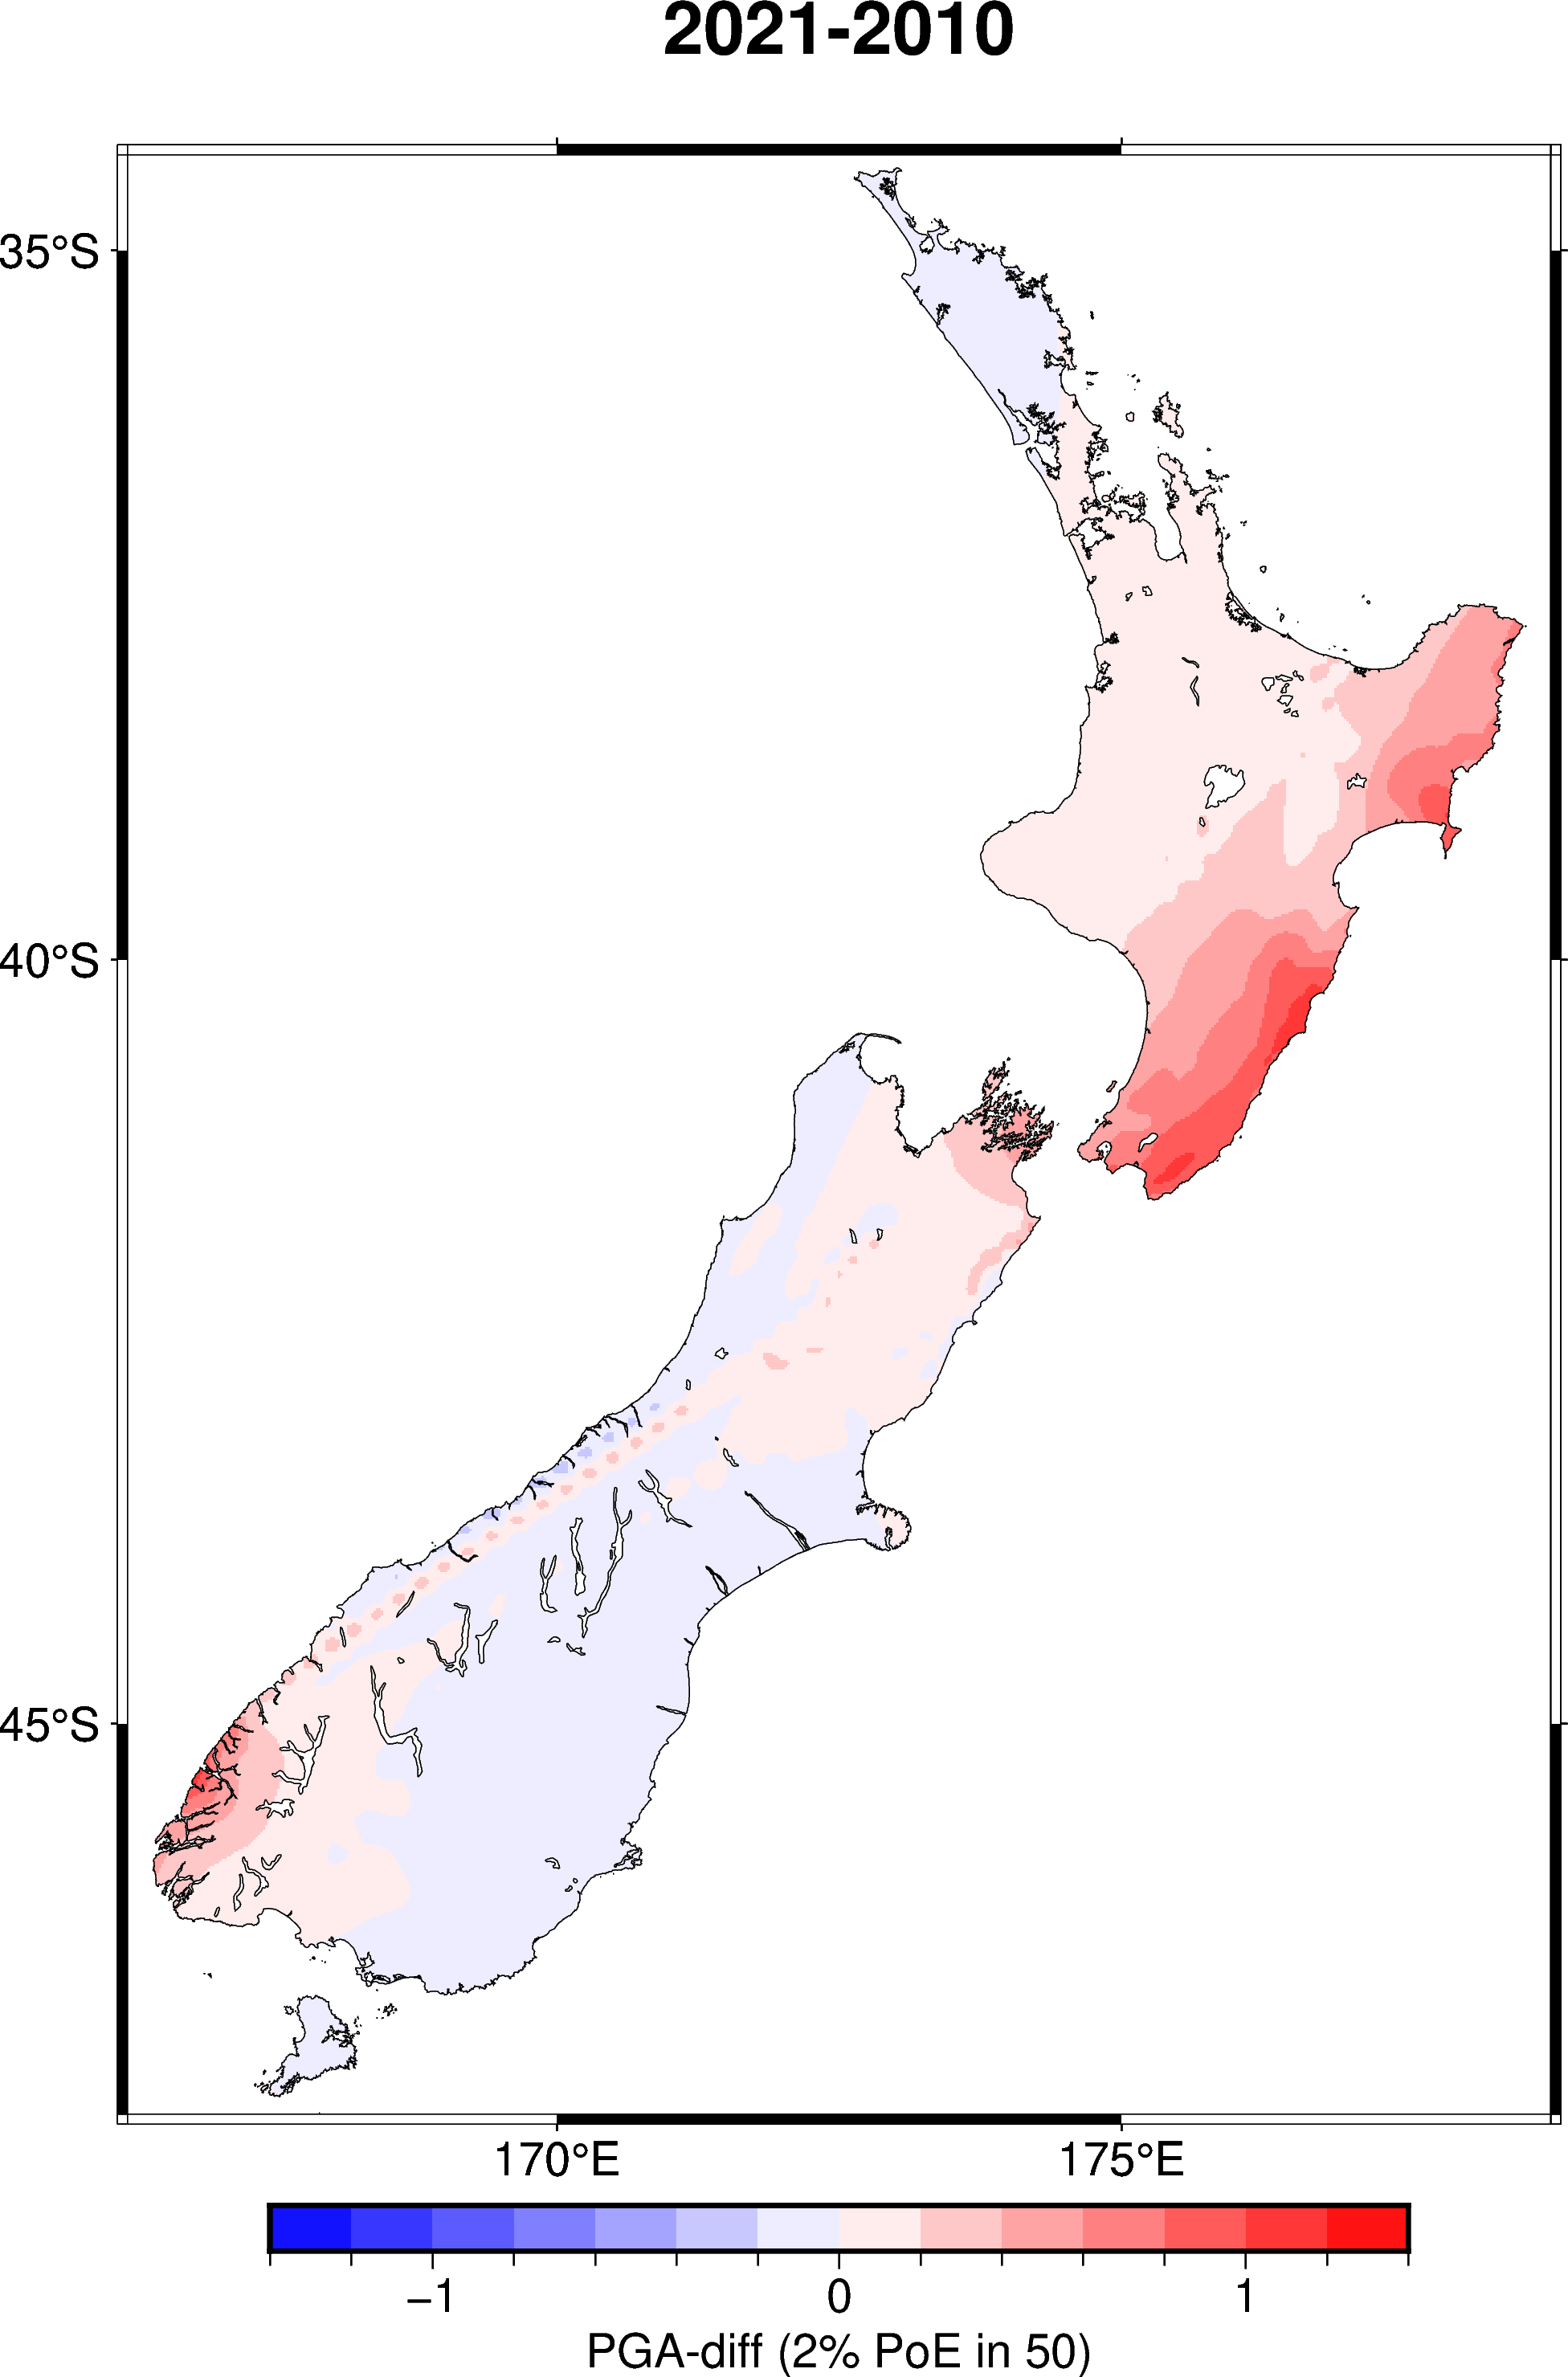

In [12]:
df = df2[["lat", "lon", "PGA_diff_2"]]
print(df["PGA_diff_2"].max())
print(df["PGA_diff_2"].min())
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
df_pv.head()

grid = xr.DataArray(data=df_pv)

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT_PRIMARY = 14)

pygmt.makecpt(cmap = "polar", series=[-1.4,1.4,0.2])
fig.grdimage(grid=grid, projection="M15c", cmap = True, dpi = 100, frame = "a")

fig.coast(shorelines = True, water="white")
fig.basemap(frame=["a", "+t2021-2010"])
fig.colorbar(frame='af+l"PGA-diff (2% PoE in 50)"')
fig.show()